In [85]:
from scipy.io import loadmat
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Loading datasets
mat = loadmat("ECGITtrain.mat")
inputECGITtrain = mat["inputECGITtrain"]
outputECGITtrain= mat["outputECGITtrain"]
print(inputECGITtrain.shape)
print(outputECGITtrain.shape)
outputECGITtrain=outputECGITtrain.reshape(len(inputECGITtrain))
print(inputECGITtrain[:5,:5])
print(outputECGITtrain[:5])
outputECGITtrain=outputECGITtrain.reshape(len(inputECGITtrain))

(200, 312)
(200, 1)
[[ 0.         0.         0.         1.2637258  9.2601681]
 [14.910554   0.         0.         0.         0.       ]
 [ 1.0045998 13.89223    9.5149614  5.         4.2430653]
 [ 0.         8.1978235  0.         0.         0.       ]
 [ 0.         2.9922511  6.0993438  7.        16.430363 ]]
[1 0 0 0 0]


In [86]:
C1 = inputECGITtrain[:,19:26] 
#print("Channel 1",C1)
C2 = inputECGITtrain[:,45:52]
#print("Channel 2",C2)
C3 = inputECGITtrain[:,71:78]
#print("Channel 3",C2)
C4 = inputECGITtrain[:,97:104]
#print("Channel 4",C2)
C5 = inputECGITtrain[:,123:130]
#print("Channel 5",C2)
C6 = inputECGITtrain[:,149:156]
#print("Channel 6",C2)
C7 = inputECGITtrain[:,175:182]
#print("Channel 7",C2)
C8 = inputECGITtrain[:,201:208]
#print("Channel 8",C2)
C9 = inputECGITtrain[:,227:234]
#print("Channel 9",C2)
C10 = inputECGITtrain[:,253:260]
#print("Channel 10",C2)
C11 = inputECGITtrain[:,279:286]
#print("Channel 11",C2)
C12 = inputECGITtrain[:,305:312]
#print("Channel 12",C2)


d1 = np.append(C1, C2, axis=1)
d1 = np.append(d1, C3, axis=1)
d1 = np.append(d1, C4, axis=1)
d1 = np.append(d1, C5, axis=1)
d1 = np.append(d1, C6, axis=1)
d1 = np.append(d1, C7, axis=1)
d1 = np.append(d1, C8, axis=1)
d1 = np.append(d1, C9, axis=1)
d1 = np.append(d1, C10, axis=1)
d1 = np.append(d1, C11, axis=1)
Xtrain_ftr_extrct = np.append(d1, C12, axis=1)
print(Xtrain_ftr_extrct.shape)
print(Xtrain_ftr_extrct[:2,:2])


(200, 84)
[[28.112628 17.818724]
 [ 0.       15.327236]]


In [87]:
scaler = StandardScaler()
scaler.fit(Xtrain_ftr_extrct)
scaled_inputECG=scaler.transform(Xtrain_ftr_extrct)
print(scaled_inputECG.shape)
print(scaled_inputECG[:5,:5])

(200, 84)
[[ 1.36779444  0.56835858 -0.58605598 -0.62999496 -0.63417844]
 [-0.98347552  0.38353729  0.57107342  3.01116756  2.51055967]
 [ 0.55362493 -0.75345378 -0.58605598 -0.62999496 -0.63417844]
 [-0.98347552  0.20257712  0.36283601  1.11921917  1.25660321]
 [ 0.48690019  1.00887809  0.92016061  2.20314582 -0.63417844]]


In [88]:
pca = PCA(n_components=2)
inputECG_pca=pca.fit_transform(scaled_inputECG)

outputECGITtrain=outputECGITtrain.reshape(len(inputECG_pca))
#Showing subset 
print(inputECG_pca[:5])
print(outputECGITtrain[:2])

[[ 6.23305705 -1.1986911 ]
 [-2.13324932 -0.22635854]
 [ 3.69168439 -0.16063487]
 [-6.20338779 -4.31648172]
 [ 0.5006318   0.40421842]]
[1 0]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


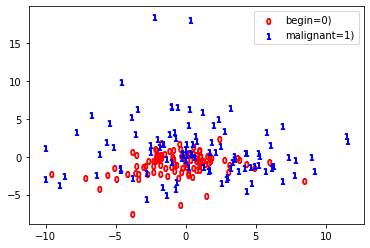

In [89]:
fig,ax=plt.subplots()
X0 =inputECG_pca [outputECGITtrain==0]
X1 = inputECG_pca[outputECGITtrain==1]
ax.scatter(X0[:,0], X0[:,1], color="red", marker="$0$", label="begin=0)")
ax.scatter(X1[:,0], X1[:,1], color="blue", marker="$1$", label="malignant=1)")
ax.legend()
fig.show() 

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(3)
classifier.fit(scaled_inputECG,outputECGITtrain)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier,scaled_inputECG,outputECGITtrain, cv=10)
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() * 100, scores.std() * 2))


pca = PCA(n_components=20)
inputECG_pca=pca.fit_transform(scaled_inputECG)

outputECGITtrain=outputECGITtrain.reshape(len(inputECG_pca))
TrainX, TestX, TrainY,TestY = train_test_split(inputECG_pca,outputECGITtrain , test_size=0.20)



KNN Accuracy: 73.50 (+/- 0.16)


In [91]:
def knnfun(n_neighbors) :
    classifier = KNeighborsClassifier(n_neighbors)
    classifier.fit(TrainX,TrainY)
    #Prediction 
    y_pred = classifier.predict(TestX)
    y_pred_train=classifier.predict(TrainX)
    #print(y_pred)
    #print(len(y_pred))
    from sklearn.metrics import classification_report, confusion_matrix
    #print(confusion_matrix(TestY, y_pred))
    #print(classification_report(TestY, y_pred))
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(TestY,y_pred)
    print("Accuary:",acc)
    return acc,n_neighbors
acc_list=[]
n_list=[1,3,5,7,9,11,13,15,17,19]
for n in n_list:
    print("accuracy when n =",n)
    acc_list.append(knnfun(n)) 
acc_list.sort()
maxi_acc=acc_list[-1]
print(maxi_acc[0],maxi_acc[1])

accuracy when n = 1
Accuary: 0.775
accuracy when n = 3
Accuary: 0.75
accuracy when n = 5
Accuary: 0.825
accuracy when n = 7
Accuary: 0.775
accuracy when n = 9
Accuary: 0.725
accuracy when n = 11
Accuary: 0.725
accuracy when n = 13
Accuary: 0.7
accuracy when n = 15
Accuary: 0.7
accuracy when n = 17
Accuary: 0.75
accuracy when n = 19
Accuary: 0.75
0.825 5


In [92]:
#Train model according to best parameter
n=maxi_acc[1]
classifier = KNeighborsClassifier(n)
classifier.fit(TrainX,TrainY)
print(TestX.shape)

y_pred = classifier.predict(TestX)
#y_pred_train=classifier.predict(TrainX)
print(y_pred)
print(len(y_pred))

(40, 20)
[1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0]
40


In [93]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(TestY, y_pred))
print(classification_report(TestY, y_pred))
from sklearn.metrics import accuracy_score
acc = accuracy_score(TestY,y_pred)
print(acc) 

[[23  1]
 [ 6 10]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        24
           1       0.91      0.62      0.74        16

    accuracy                           0.82        40
   macro avg       0.85      0.79      0.80        40
weighted avg       0.84      0.82      0.82        40

0.825


In [94]:
#Working on Test Data
inputECGITtest = mat["inputECGITtest"]
#cancerTestX = cancerTestX.transpose()
#Data preprocessing i.e 


C1 = inputECGITtest[:,19:26] 
#print("Channel 1",C1)
C2 = inputECGITtest[:,45:52]
#print("Channel 2",C2)
C3 = inputECGITtest[:,71:78]
#print("Channel 3",C2)
C4 = inputECGITtest[:,97:104]
#print("Channel 4",C2)
C5 = inputECGITtest[:,123:130]
#print("Channel 5",C2)
C6 = inputECGITtest[:,149:156]
#print("Channel 6",C2)
C7 = inputECGITtest[:,175:182]
#print("Channel 7",C2)
C8 = inputECGITtest[:,201:208]
#print("Channel 8",C2)
C9 = inputECGITtest[:,227:234]
#print("Channel 9",C2)
C10 = inputECGITtest[:,253:260]
#print("Channel 10",C2)
C11 = inputECGITtest[:,279:286]
#print("Channel 11",C2)
C12 = inputECGITtest[:,305:312]
#print("Channel 12",C2)


d1 = np.append(C1, C2, axis=1)
d1 = np.append(d1, C3, axis=1)
d1 = np.append(d1, C4, axis=1)
d1 = np.append(d1, C5, axis=1)
d1 = np.append(d1, C6, axis=1)
d1 = np.append(d1, C7, axis=1)
d1 = np.append(d1, C8, axis=1)
d1 = np.append(d1, C9, axis=1)
d1 = np.append(d1, C10, axis=1)
d1 = np.append(d1, C11, axis=1)
Xtest_ftr_extrct = np.append(d1, C12, axis=1)
print(Xtest_ftr_extrct.shape)

scalerTest = StandardScaler()
scalerTest.fit(Xtest_ftr_extrct)
inputECGITtest_scaled=scaler.transform(Xtest_ftr_extrct)

#print(scaled[:3,:2])

#Now apply PCA for Visulization
pca = PCA(n_components=20)
inputECGITtest_pca2=pca.fit_transform(inputECGITtest_scaled)

#cancerTrainY=cancerTrainY.reshape(len(cancerTestX_pca))
#Showing subset 
print(inputECGITtest_pca2[:2])
print(inputECGITtest_pca2.shape)
#print(.shape)

(100, 84)
[[-1.88839527e+00 -1.32610379e+00 -1.05112612e+00 -1.37143423e+00
   4.74590012e-03 -9.91996030e-01 -4.94001788e-01 -6.50201335e-01
  -4.05542869e-01  2.28859332e-01 -1.39149903e+00 -4.12649423e-01
  -1.23778252e+00  3.42718042e-01 -4.85961534e-01  3.96253794e-01
   4.95837080e-01  2.46102052e-01 -2.23766267e-01  3.93880101e-01]
 [-1.22211157e-01 -1.92546345e+00 -1.04579362e+00  4.85705780e+00
   1.36301280e-01  1.95683009e+00 -8.86793860e-01 -2.25535423e-02
   1.86799850e+00 -2.76511552e-01 -1.02740677e+00  1.66419692e+00
   5.62305227e-01  4.97402928e-01 -1.55052354e+00 -1.14942313e+00
   1.07021571e+00 -2.33488446e+00  3.86907968e-01 -6.67524181e-01]]
(100, 20)


In [95]:
y_pred_testx = classifier.predict(inputECGITtest_pca2)
print(y_pred_testx)
print(len(y_pred_testx))
from sklearn.metrics import accuracy_score
acc = accuracy_score(TestY,y_pred)
print("Accuracy",acc) 

[0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0
 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
100
Accuracy 0.825


In [96]:
# Now Implement Decsion tree
from sklearn import tree
#clf_d = tree.DecisionTreeClassifier()
def decsionTree(max_depth,min_sample_leaf):
    
    clf_gini = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=max_depth, min_samples_leaf=min_sample_leaf)
    clf_gini.fit(TrainX,TrainY)
    y_predd = clf_gini.predict(TestX)
    print(y_predd[:10])
    acc = accuracy_score(TestY,y_predd)
    print("accuracy when max and min value:",max_depth,min_sample_leaf)
    print(acc)
    return acc,max_depth,min_sample_leaf
acc_list_DT=[]
acc_list_DT.append(decsionTree(3,5))
acc_list_DT.append(decsionTree(10,4))
acc_list_DT.append(decsionTree(10,5))
acc_list_DT.append(decsionTree(2,2))
acc_list_DT.append(decsionTree(12,1))
acc_list_DT.sort()
temp=acc_list_DT[-1]
print("best accuracy with optimal parameter",temp[0],temp[1],temp[2])
maxdep=temp[1]
leaf_sample=temp[2]
b_model_DT=tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=maxdep, min_samples_leaf=leaf_sample)
b_model_DT.fit(TrainX,TrainY)

[1 0 0 0 0 1 0 1 0 0]
accuracy when max and min value: 3 5
0.775
[1 0 1 0 0 1 1 1 1 0]
accuracy when max and min value: 10 4
0.65
[1 0 1 0 0 1 0 1 1 0]
accuracy when max and min value: 10 5
0.75
[1 0 0 1 0 1 0 1 0 0]
accuracy when max and min value: 2 2
0.775
[1 0 1 0 0 1 0 1 0 1]
accuracy when max and min value: 12 1
0.75
best accuracy with optimal parameter 0.775 3 5


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [97]:
y_predd = b_model_DT.predict(TestX)
print(y_predd[:10])
acc = accuracy_score(TestY,y_predd)
print(acc)

[1 0 0 0 0 1 0 1 0 0]
0.775


In [98]:
y_pred_testx = b_model_DT.predict(inputECGITtest_pca2)
print(y_pred_testx)
print(len(y_pred_testx))

[0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1
 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1
 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0]
100


In [99]:
#now ANN
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
mlp1 = MLPClassifier(hidden_layer_sizes=(60,80,90), activation='relu', solver='adam', max_iter=500)
mlp1.fit(TrainX,TrainY)
#2nd model
mlp2 = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver='adam', max_iter=500)
mlp2.fit(TrainX,TrainY)
#3rd model
mlp3 = MLPClassifier(hidden_layer_sizes=(10,20,30), activation='relu', solver='adam', max_iter=500)
mlp3.fit(TrainX,TrainY)
#4th model
mlp4 = MLPClassifier(hidden_layer_sizes=(50,80,100), activation='relu', solver='adam', max_iter=500)
mlp4.fit(TrainX,TrainY)

def predandacc(model,model_n):
    predict_test = model.predict(TestX)
    #print(predict_test[:10])
    #print(len(predict_test))
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(TestY,predict_test)
    print("Accuracy with model:",model_n,acc)
    return acc,model
acc_list=[]
acc_list.append(predandacc(mlp1,1))
acc_list.append(predandacc(mlp2,2))
acc_list.append(predandacc(mlp3,3))
acc_list.append(predandacc(mlp4,4))
def takeFirst(elem):
    return elem[0]

acc_list.sort(key=takeFirst)
#random.sort(key=takeSecond)
temp=acc_list[-1]
#best_model=temp[0][1]
print("The Best model is :",temp)
b_model=temp[1]
#print(b_model)
#train model with best classifier 
b_model.fit(TrainX,TrainY)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy with model: 1 0.725
Accuracy with model: 2 0.75
Accuracy with model: 3 0.675
Accuracy with model: 4 0.75
The Best model is : (0.75, MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 80, 100), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False))


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 80, 100), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [84]:
y_pred_testx = b_model.predict(inputECGITtest_pca2)
print(y_pred_testx)
print(len(y_pred_testx))

[0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1]
100
